The MNIST dataset contains 28 by 28 grayscale images of single handwritten digits between 0 and 9. The set consists of a total of 70,000 images, the training set having 60,000 and the test set has 10,000. This means that there are 10 classes of digits, which includes the labels for the numbers 0 to 9.

In [1]:
# Libraries

import torch # &PyTorch
import torch.nn as nn # &Neural Network
import torch.nn.functional as F # &Functions for Neural Network (e.g. ReLU)
import torchvision #! PyTorch for Computer Vision
import torchvision.transforms as transforms #! Transformations for Computer Vision
import matplotlib.pyplot as plt #! Matplotlib for Visualization

from tqdm import tqdm

In [2]:
"""
we are just working with a simple feedforward network that has 3 layers: an input layer, a hidden layer, and an output layer.
"""

class NeuralNet(nn.Module): #~ Neural Network Class
    def __init__(self, input_size, hidden_size, num_classes): #~Constructor for Neural Network Class

        super(NeuralNet, self).__init__() #~Superclass Constructor (nn.Module)

        self.fc1 = nn.Linear(input_size, hidden_size) #~ Fully Connected Layer 1 (Input Layer)
        self.fc2 = nn.Linear(hidden_size, 128) #~ Fully Connected Layer 2 (Hidden Layer)
        self.fc3 = nn.Linear(128, num_classes) #~ Fully Connected Layer 3 (Output Layer)
        # num_classes = 10 for MNIST dataset (0-9)

    def forward(self, x): #* Forward Propagation
        
        x = x.view(-1, 784)  # flatten the input tensor, 28*28 = 784
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        return x #* Return Outputz

In [ ]:
def train(model, train_loader, criterion, optimizer, device):

    #  function to train the model (forward, backward, update)

    model.train() # sets the mode of the PyTorch neural network model to training mode.
    train_loss = 0

    for images, labels in train_loader: #* Iterate through the train_loader to get the images and labels
        images = images.to(device) #* Move images to the device (GPU or CPU)
        labels = labels.to(device) #* Move labels to the device (GPU or CPU)

        optimizer.zero_grad() #* Clear gradients w.r.t. parameters

        outputs = model(images.reshape(-1, 28 * 28)) #* Forward pass to get output/logits (28 * 28 = 784)

        loss = criterion(outputs, labels) #* Calculate Loss: softmax --> cross entropy loss
        loss.backward() #* Getting gradients w.r.t. parameters (Backpropagation) #  computes the gradients of the loss function with respect to the model parameters

        optimizer.step() #* Updating parameters
        train_loss += loss.item() #* Update training loss

    return train_loss / len(train_loader) #* Return average training loss


def test(model, test_loader, criterion, device): 

    # function to test the model
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad(): 
        for images, labels in test_loader:

            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images.reshape(-1, 28 * 28)) #! Forward pass only to get logits/output (28 * 28 = 784)
            test_loss += criterion(outputs, labels).item()

            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item() #! Total correct predictions

    return test_loss / len(test_loader), correct / len(test_loader.dataset) #! Return average test loss and accuracy

In [3]:
input_size = 28 * 28  # for MNIST dataset
hidden_size = 300 # 100 neurons in the hidden layer
num_classes = 10 # 10 classes for MNIST dataset (0-9)

model = NeuralNet(input_size, hidden_size, num_classes)

#* Use GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

from torchsummary import summary
summary(model, (3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 300]         235,500
            Linear-2                  [-1, 128]          38,528
            Linear-3                   [-1, 10]           1,290
Total params: 275,318
Trainable params: 275,318
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.00
Params size (MB): 1.05
Estimated Total Size (MB): 1.06
----------------------------------------------------------------


In [ ]:
device

device(type='cuda')

In [ ]:
# To Calulate Mean and S.D for Normalize

# train_dataset = torchvision.datasets.MNIST(root='data/', train=True, transform=transforms.ToTensor(), download=True)
# #! Download the train dataset
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
# #^ Load the train dataset in batches

# def get_mean_and_std(dataloader):
#     channels_sum, channels_squared_sum, num_batches = 0, 0, 0
#     for data, _ in dataloader:
#         # Mean over batch, height and width, but not over the channels
#         channels_sum += torch.mean(data, dim=[0,2,3])
#         channels_squared_sum += torch.mean(data**2, dim=[0,2,3])
#         num_batches += 1
    
#     mean = channels_sum / num_batches

#     # std = sqrt(E[X^2] - (E[X])^2)
#     std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5

#     return mean, std

# get_mean_and_std(train_loader)

In [4]:
# Load MNIST dataset

#  transform the images into a suitable form that could work with the model
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) 
])    

train_dataset = torchvision.datasets.MNIST(root='data/', train=True, transform=transform, download=True)
#! Download the train dataset

test_dataset = torchvision.datasets.MNIST(root='data/', train=False, transform=transform, download=True)
#! Download the test dataset

batch_size = 64 # 64 images in a batch

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#^ Load the train dataset in batches

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
#^ Load the test dataset in batches

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
criterion = nn.CrossEntropyLoss() #* Cross Entropy Loss (cost function)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) #* ADAM (optimizer) with learning rate of 0.001

num_epochs = 15

In [ ]:
train_losses = []
test_losses = []
test_accs = []

for epoch in tqdm(range(num_epochs)): 

    train_loss = train(model, train_loader, criterion, optimizer, device)
    test_loss, test_acc = test(model, test_loader, criterion, device)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accs.append(test_acc)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

  7%|▋         | 1/15 [00:17<04:04, 17.46s/it]

Epoch [1/15], Train Loss: 1.5710, Test Loss: 1.5169, Test Accuracy: 0.9463


 13%|█▎        | 2/15 [00:34<03:44, 17.24s/it]

Epoch [2/15], Train Loss: 1.5106, Test Loss: 1.5088, Test Accuracy: 0.9532


 20%|██        | 3/15 [00:52<03:28, 17.41s/it]

Epoch [3/15], Train Loss: 1.5020, Test Loss: 1.5074, Test Accuracy: 0.9533


 27%|██▋       | 4/15 [01:08<03:08, 17.12s/it]

Epoch [4/15], Train Loss: 1.4951, Test Loss: 1.5009, Test Accuracy: 0.9601


 33%|███▎      | 5/15 [01:25<02:49, 16.98s/it]

Epoch [5/15], Train Loss: 1.4920, Test Loss: 1.4960, Test Accuracy: 0.9655


 40%|████      | 6/15 [01:44<02:37, 17.51s/it]

Epoch [6/15], Train Loss: 1.4891, Test Loss: 1.4902, Test Accuracy: 0.9706


 47%|████▋     | 7/15 [02:01<02:19, 17.40s/it]

Epoch [7/15], Train Loss: 1.4873, Test Loss: 1.4893, Test Accuracy: 0.9715


 53%|█████▎    | 8/15 [02:18<02:00, 17.24s/it]

Epoch [8/15], Train Loss: 1.4850, Test Loss: 1.4941, Test Accuracy: 0.9667


 60%|██████    | 9/15 [02:35<01:43, 17.17s/it]

Epoch [9/15], Train Loss: 1.4851, Test Loss: 1.4867, Test Accuracy: 0.9744


 67%|██████▋   | 10/15 [02:53<01:27, 17.45s/it]

Epoch [10/15], Train Loss: 1.4847, Test Loss: 1.4898, Test Accuracy: 0.9712


 73%|███████▎  | 11/15 [03:09<01:08, 17.21s/it]

Epoch [11/15], Train Loss: 1.4841, Test Loss: 1.4882, Test Accuracy: 0.9729


 80%|████████  | 12/15 [03:26<00:51, 17.11s/it]

Epoch [12/15], Train Loss: 1.4826, Test Loss: 1.4885, Test Accuracy: 0.9724


 87%|████████▋ | 13/15 [03:44<00:34, 17.15s/it]

Epoch [13/15], Train Loss: 1.4820, Test Loss: 1.4884, Test Accuracy: 0.9729


 93%|█████████▎| 14/15 [04:01<00:17, 17.28s/it]

Epoch [14/15], Train Loss: 1.4817, Test Loss: 1.4913, Test Accuracy: 0.9699


100%|██████████| 15/15 [04:18<00:00, 17.23s/it]

Epoch [15/15], Train Loss: 1.4802, Test Loss: 1.4873, Test Accuracy: 0.9737


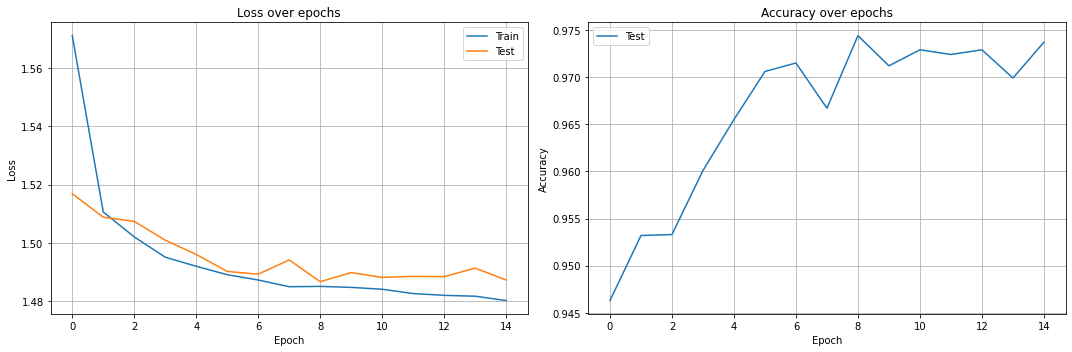

In [ ]:
def visualize_results(train_losses, test_losses, test_accs): #^ function to visualize the results

    fig, axs = plt.subplots(1, 2, figsize=(15, 5)) #^ Create a figure and a set of subplots

    axs[0].plot(train_losses, label='Train') #^ Plot the train losses in the first subplot
    axs[0].plot(test_losses, label='Test') #^ Plot the test losses in the first subplot
    axs[0].set_title('Loss over epochs')

    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()

    axs[0].grid(True)
    
    axs[1].plot(test_accs, label='Test') #^ Plot the test accuracies in the second subplot
    axs[1].set_title('Accuracy over epochs')
    axs[1].set_xlabel('Epoch')

    axs[1].set_ylabel('Accuracy')

    axs[1].legend()
    axs[1].grid(True)
    
    plt.tight_layout() 
    plt.show()

visualize_results(train_losses, test_losses, test_accs) #! Visualize the results

In [ ]:
# Save the Model

PATH = '/content/drive/MyDrive/Colab_Work/Pytorch/mnist_2.pth'
torch.save(model.state_dict(), PATH)

In [6]:
# # Load THe model
PATH = '/content/drive/MyDrive/Colab_Work/Pytorch/mnist_2.pth'
model = NeuralNet(input_size, hidden_size, num_classes)
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

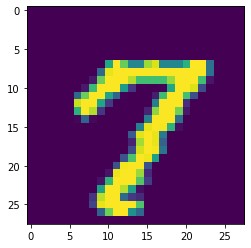

tensor(7)


In [7]:
a,b = next(iter(train_loader))

plt.imshow(a[3].view(28, 28))
plt.show()
print(torch.argmax(model(a[3].view(-1, 784))[0]))